# World Bank API in Python

by Avery M. Fernandez

See the [World Bank API documentation](https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation)

These recipe examples were tested on February 13, 2022

## 1. Get list of country iso2Codes and names

First, import libraries needed to pull data from the API:

In [ ]:
from time import sleep
import requests
from pprint import pprint

For obtaining data from the World Bank API, it is helpful to first obtain a list of country codes and names.

In [ ]:
# define root WorldBank API
api = 'https://api.worldbank.org/v2/'

# define api url for getting country code data
country_url = api + 'country/?format=json&per_page=500'

# read the url and import data as JSON data
country_data = requests.get(country_url).json()[1]
pprint(country_data[0]) # shows first bit of data
print(len(country_data)) # shows the size of data

{'adminregion': {'id': '', 'iso2code': '', 'value': ''},
 'capitalCity': 'Oranjestad',
 'id': 'ABW',
 'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
 'iso2Code': 'AW',
 'latitude': '12.5167',
 'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
 'longitude': '-70.0167',
 'name': 'Aruba',
 'region': {'id': 'LCN',
            'iso2code': 'ZJ',
            'value': 'Latin America & Caribbean '}}
299


In [ ]:
# Extract out iso2code from countries data
country_iso2Code = []
for isos in range(len(country_data)):
    country_iso2Code.append(country_data[isos]["iso2Code"])
pprint(country_iso2Code[0:10]) # shows first 10
print(len(country_iso2Code)) # shows the size of data

['AW', 'ZH', 'AF', 'A9', 'ZI', 'AO', 'AL', 'AD', '1A', 'AE']
299


In [ ]:
# Extract out country names
country_name = []
for names in range(len(country_data)):
    country_name.append(country_data[names]["name"])
pprint(country_name[0:10]) # shows first 10
print(len(country_name)) # shows the size of data

['Aruba',
 'Africa Eastern and Southern',
 'Afghanistan',
 'Africa',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates']
299


In [ ]:
# now combine country_iso2Code and country name
country_iso2code_name = {country_iso2Code[i]: country_name[i] for i in range(len(country_iso2Code))}
print(len(country_iso2code_name)) # shows the size of data

299


Now we know the country iso2Codes which we can use to pull specific indicator data for countries.


## 2. Compile a Custom Indicator Dataset

There are many availabe indicators: https://data.worldbank.org/indicator

We wll select three indicators for this example:

1. Scientific and Technical Journal Article Data = [IP.JRN.ARTC.SC](https://data.worldbank.org/indicator/IP.JRN.ARTC.SC?view=chart)

2. Patent Applications, residents = [IP.PAT.RESD](https://data.worldbank.org/indicator/IP.PAT.RESD?view=chart)

3. GDP per capita (current US$) Code = [NY.GDP.PCAP.CD](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart)

Note that these three selected indictaors have a [CC-BY 4.0 license](https://datacatalog.worldbank.org/public-licenses#cc-by) We will compile this indicator data for the United States (US) and United Kingdom (GB)

In [ ]:
indicators = ['IP.JRN.ARTC.SC','IP.PAT.RESD','NY.GDP.PCAP.CD']

Generate the web API urls we need for U.S and retrieve the data.


In [ ]:
US_api_URL = {}
US_indicator_data = {}
for number in range(len(indicators)):
    US_api_URL = api + 'country/US/indicator/' + indicators[number] + '/?format=json&per_page=500'
    US_indicator_data[number] = requests.get(US_api_URL).json()
    sleep(1)

Generate web API urls we need for the UK (GB)



In [ ]:
UK_api_URL = {}
UK_indicator_data = {}
for number in range(len(indicators)):
    UK_api_URL = api + 'country/GB/indicator/' + indicators[number] + '/?format=json&per_page=500'
    UK_indicator_data[number] = requests.get(UK_api_URL).json()
    sleep(1)

Now we need to extract the data and compile for analysis.

column 1: year

column 2: Scientific and Technical Journal Article Data = `IP.JRN.ARTC.SC`

column 3: Patent Applications, residents = `IP.PAT.RESD`

column 4: GDP per capita (current US$) Code = `NY.GDP.PCAP.CD`


> **_NOTE:_**  float(x or 'nan') is used to get rid of empty cells.

In [ ]:
# US Data compilation
US_data = {}
for years in range(len(US_indicator_data[0][1])):
    US_data[int(US_indicator_data[0][1][years]["date"])] = [float(US_indicator_data[0][1][years]["value"] or 'nan'), 
                                                            float(US_indicator_data[1][1][years]["value"] or 'nan'), 
                                                            float(US_indicator_data[2][1][years]["value"] or 'nan')]
pprint(US_data)

{1960: [nan, nan, 3007.12344537862],
 1961: [nan, nan, 3066.56286916615],
 1962: [nan, nan, 3243.84307754988],
 1963: [nan, nan, 3374.51517105082],
 1964: [nan, nan, 3573.94118474743],
 1965: [nan, nan, 3827.52710972039],
 1966: [nan, nan, 4146.31664631665],
 1967: [nan, nan, 4336.42658722171],
 1968: [nan, nan, 4695.92339043178],
 1969: [nan, nan, 5032.14474262003],
 1970: [nan, nan, 5234.2966662115],
 1971: [nan, nan, 5609.38259952519],
 1972: [nan, nan, 6094.01798986165],
 1973: [nan, nan, 6726.35895596695],
 1974: [nan, nan, 7225.69135952566],
 1975: [nan, nan, 7801.45666356443],
 1976: [nan, nan, 8592.25353727612],
 1977: [nan, nan, 9452.57651914511],
 1978: [nan, nan, 10564.9482220275],
 1979: [nan, nan, 11674.1818666548],
 1980: [nan, 62098.0, 12574.7915062163],
 1981: [nan, 62404.0, 13976.10539252],
 1982: [nan, 63316.0, 14433.787727053],
 1983: [nan, 59391.0, 15543.8937174925],
 1984: [nan, 61841.0, 17121.2254849995],
 1985: [nan, 63673.0, 18236.8277265009],
 1986: [nan, 65195

UK Data extraction

column 1: year

column 2: Scientific and Technical Journal Article Data = `IP.JRN.ARTC.SC`

column 3: Patent Applications, residents = `IP.PAT.RESD`

column 4: GDP per capita (current US$) Code = `NY.GDP.PCAP.CD`


> **_NOTE:_**  float(x or 'nan') is used to get rid of empty cells.

In [ ]:
UK_data = {}
for years in range(len(UK_indicator_data[0][1])):
    UK_data[int(UK_indicator_data[0][1][years]["date"])] = [float(UK_indicator_data[0][1][years]["value"] or 'nan'), 
                                                            float(UK_indicator_data[1][1][years]["value"] or 'nan'), 
                                                            float(UK_indicator_data[2][1][years]["value"] or 'nan')]
pprint(UK_data)

{1960: [nan, nan, 1397.5948032844],
 1961: [nan, nan, 1472.38571407868],
 1962: [nan, nan, 1525.77585271032],
 1963: [nan, nan, 1613.45688373392],
 1964: [nan, nan, 1748.2881176141],
 1965: [nan, nan, 1873.56777435421],
 1966: [nan, nan, 1986.74715869685],
 1967: [nan, nan, 2058.78188198056],
 1968: [nan, nan, 1951.75859587532],
 1969: [nan, nan, 2100.66786858672],
 1970: [nan, nan, 2347.54431773747],
 1971: [nan, nan, 2649.80151387223],
 1972: [nan, nan, 3030.43251411977],
 1973: [nan, nan, 3426.27622050378],
 1974: [nan, nan, 3665.8627976419],
 1975: [nan, nan, 4299.74561799284],
 1976: [nan, nan, 4138.16778761535],
 1977: [nan, nan, 4681.43993173038],
 1978: [nan, nan, 5976.93816899991],
 1979: [nan, nan, 7804.76208051155],
 1980: [nan, 19612.0, 10032.062080015],
 1981: [nan, 20808.0, 9599.30622221965],
 1982: [nan, 20530.0, 9146.07735701852],
 1983: [nan, 19893.0, 8691.51881306514],
 1984: [nan, 19093.0, 8179.19444064991],
 1985: [nan, 19672.0, 8652.21654247593],
 1986: [nan, 20040

## 3. Plot Indicator data

Create a line plot of US/UK Number of Scientific and Technical Journal Articles and Patents by year

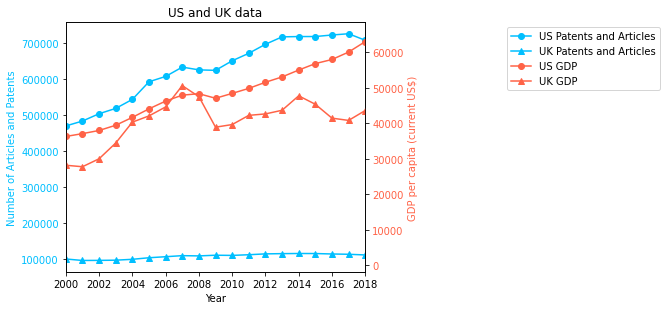

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# US Data
US_patentsandarticles = []
US_gdp = []
data_years = list(US_data.keys())
data_years.sort()
for years in data_years:
    US_patentsandarticles.append(US_data.get(years)[0]+US_data.get(years)[1])
    US_gdp.append(US_data.get(years)[2])

# UK Data
UK_patentsandarticles = []
UK_gdp = []
data_years = list(UK_data.keys())
data_years.sort()
for years in data_years:
    UK_patentsandarticles.append(UK_data.get(years)[0]+UK_data.get(years)[1])
    UK_gdp.append(UK_data.get(years)[2])

fig, ax1 = plt.subplots()
ax1.set_ylabel("Number of Articles and Patents", {'color': 'deepskyblue'})
ax1.plot(data_years,US_patentsandarticles, label = "US Patents and Articles", 
         marker="o", color="deepskyblue")
ax1.plot(data_years,UK_patentsandarticles, label = "UK Patents and Articles", 
         marker="^", color="deepskyblue")
ax1.tick_params(axis='y', labelcolor="deepskyblue")

ax2 = ax1.twinx()
ax2.set_ylabel("GDP per capita (current US$)", {'color': 'tomato'})
ax2.plot(data_years,US_gdp, label = "US GDP", marker="o", color="tomato")
ax2.plot(data_years,UK_gdp, label = "UK GDP", marker="^", color="tomato")
ax2.tick_params(axis='y', labelcolor="tomato")

fig.tight_layout()
ax1.set_xlabel("Year")
plt.title("US and UK data")
plt.xlim(2000,2018)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend(lines, labels, bbox_to_anchor=(2, 1), ncol=1)
#fig.legend(lines, labels,loc = 'upper right')
plt.show()